<a href="https://colab.research.google.com/github/champsleague/Data-Science-Projects/blob/main/TP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10900970 entries, 0 to 32592
Data columns (total 10 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   code_module                 object 
 1   assessment_type             object 
 2   weight                      float64
 3   score                       float64
 4   module_presentation_length  float64
 5   date                        float64
 6   sum_click                   float64
 7   highest_education           object 
 8   num_of_prev_attempts        float64
 9   final_result                object 
dtypes: float64(6), object(4)
memory usage: 914.8+ MB
None
    code_module assessment_type  weight
200         GGG             CMA     0.0
115         EEE             TMA    28.0
36          BBB             CMA     1.0
205         GGG            Exam   100.0
183         GGG             TMA     0.0
101         DDD            Exam   100.0
144         FFF             TMA    12.5
164         FFF  

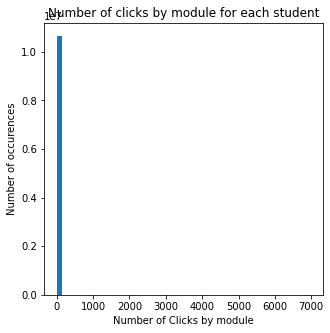

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt

assessments = pd.read_csv("assessments.csv")
del assessments["code_presentation"]
del assessments["id_assessment"]
del assessments["date"]
# print(assessments)

student_Assessment = pd.read_csv("studentAssessment.csv")
del student_Assessment["id_assessment"]
del student_Assessment["id_student"]
del student_Assessment["date_submitted"]
del student_Assessment["is_banked"]
# print(student_Assessment)

courses = pd.read_csv("courses.csv")
del courses["code_presentation"]
# print(courses)

studentRegistration = pd.read_csv("studentRegistration.csv")
del studentRegistration["code_presentation"]
del studentRegistration["id_student"]
del studentRegistration["date_registration"]
del studentRegistration["date_unregistration"]
# print(studentRegistration)

vle = pd.read_csv("vle.csv")
del vle["id_site"]
del vle["code_presentation"]
del vle["activity_type"]
del vle["week_from"]
del vle["week_to"]
# print(vle)

studentVle = pd.read_csv("studentVle.csv")
del studentVle["code_presentation"]
del studentVle["id_student"]
del studentVle["id_site"]
# print(studentVle)

studentInfo = pd.read_csv("studentInfo.csv")
del studentInfo["code_presentation"]
del studentInfo["id_student"]
del studentInfo["gender"]
del studentInfo["region"]
del studentInfo["imd_band"]
del studentInfo["age_band"]
del studentInfo["studied_credits"]
del studentInfo["disability"]
# print(studentInfo)


total = pd.concat([assessments,student_Assessment,courses,studentRegistration,vle,studentVle,studentInfo],axis=0)
print(total.info())

df1 = assessments.sample(10)
df2 = student_Assessment.sample(10)
courses.sample(10)
studentRegistration.sample(10)
vle.sample(10)
studentVle.sample(10)
studentInfo.sample(10)

print(df1)

interaction_by_module = studentVle.sum_click
fig2, ax2 = plt.subplots(figsize=(5,5));
ax2.hist(interaction_by_module,bins=50);
ax2.set_xlabel('Number of Clicks by module');
ax2.set_title('Number of clicks by module for each student');
ax2.set_ylabel('Number of occurences');

,id_student,num_of_prev_attempts,studied_credits,score,sum_click
count,2.893900e+04,28939.000000,28939.000000,28939.000000,28939.000000
mean,7.061386e+05,0.152631,77.559695,72.275828,1529.447044
std,5.481240e+05,0.460283,38.466333,16.893861,1770.249637
min,6.516000e+03,0.000000,30.000000,0.000000,1.000000
25%,5.087540e+05,0.000000,60.000000,64.000000,405.000000
50%,5.895690e+05,0.000000,60.000000,75.750000,931.000000
75%,6.365795e+05,0.000000,90.000000,84.444444,1992.000000
max,2.698588e+06,6.000000,630.000000,100.000000,24139.000000


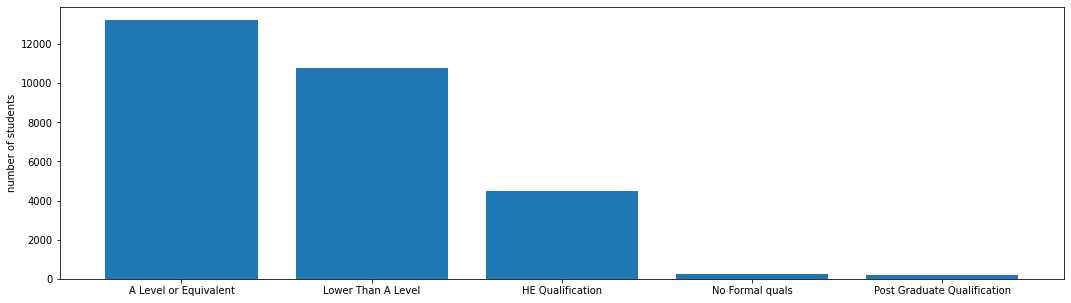

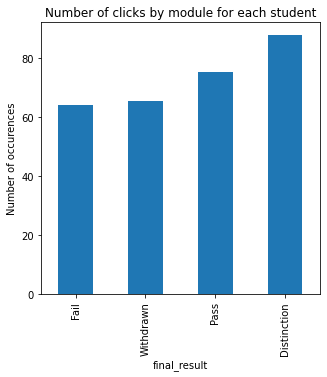

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assessments = pd.read_csv("assessments.csv")
student_Assessment = pd.read_csv("studentAssessment.csv")
courses = pd.read_csv("courses.csv")
studentRegistration = pd.read_csv("studentRegistration.csv")
vle = pd.read_csv("vle.csv")
studentVle = pd.read_csv("studentVle.csv")
studentInfo = pd.read_csv("studentInfo.csv")

# drop unavailable data
assessments.drop(['code_presentation','assessment_type','date','weight'], axis = 1, inplace = True)
comb_assess = pd.merge(student_Assessment,assessments,on='id_assessment')
comb_assess.drop(['is_banked','date_submitted'],axis = 1,inplace=True)
comb_assess.dtypes

# group and sort values of 'id_student'
grouped = comb_assess.groupby(['id_student','code_module']).mean()
grouped.sort_values('id_student')
grouped.drop(['id_assessment'],axis=1,inplace = True)
grouped.head()

# arrange data of 'id_student' of studentInfo.csv and studentVle.csv
student_all_info = pd.merge(studentInfo,grouped,on='id_student')
vle_grouped = studentVle.groupby(['id_student','code_module']).sum()
vle_grouped.drop(['id_site','date'],axis=1,inplace=True)
vle_grouped.head()

# merge two dataset based on the previous work
df = pd.merge(student_all_info,vle_grouped,on = ['id_student','code_module'],how='left')
df.dropna(inplace=True)
df.to_csv('joinedData.csv',index=False)

# arrange data into categorical way
df.code_module = pd.Categorical(df.code_module)
df.code_presentation = pd.Categorical(df.code_presentation)
df.gender = pd.Categorical(df.gender)
df.region = pd.Categorical(df.region)
df.highest_education = pd.Categorical(df.highest_education)
df.imd_band = pd.Categorical(df.imd_band)
df.age_band = pd.Categorical(df.age_band)
df.disability = pd.Categorical(df.disability)
df.final_result = pd.Categorical(df.final_result)
df.head()


import plotly.express as px
data = df
fig = px.box(data, x="code_module", y="score",title='Student average scores by Module')
# fig.show()


highest_ed = df.highest_education.value_counts()
f, ax = plt.subplots(figsize=(18,5))
ax.bar(highest_ed.index,highest_ed)
ax.set_ylabel('number of students')
df.highest_education.cat.categories


interaction_by_module = df.sum_click
fig2, ax2 = plt.subplots(figsize=(5,5));
# ax2.hist(interaction_by_module,bins=10);
ax2.set_xlabel('Number of Clicks by module');
ax2.set_title('Number of clicks by module for each student');
ax2.set_ylabel('Number of occurences');

# df.groupby('final_result').sum_click.mean().sort_values().plot(kind='bar')
df.groupby('final_result').score.mean().sort_values().plot(kind='bar',)





df.isnull().sum()
df.dropna(inplace=True)
df.describe()

# df_target = df.score
# df.drop(['score'],axis=1,inplace=True)
# df.drop(['id_student'],axis=1,inplace=True)
# df.hist()

In [ ]:
from google.colab import files
myfile = files.upload()

Saving assessments.csv to assessments.csv
Saving courses.csv to courses.csv
Saving studentAssessment.csv to studentAssessment.csv
Saving studentInfo.csv to studentInfo.csv
Saving studentRegistration.csv to studentRegistration.csv
Saving studentVle.csv to studentVle.csv
Saving vle.csv to vle.csv
